In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
hl = pd.read_csv('Health_dataset1.csv')


In [3]:
select_needy = hl.loc[hl['Target'] == 1]
print (select_needy)
  

         Aadhar_id  Rationcard_Category  Monthly_Income  Gender  \
0     199000000000                    1           10000       1   
1     994000000000                    1           10000       1   
2     299000000000                    1           10000       1   
4     499000000000                    1            9000       1   
8     994000000000                    0            3000       1   
...            ...                  ...             ...     ...   
982   272000000000                    0             500       1   
991   182000000000                    0            2000       0   
992   172000000000                    0            2500       0   
993   162000000000                    0            3000       0   
1000  289000000000                    0            1500       1   

      Chronic _Disease  Critical _or _noncritical  Surgery_needed  Target  
0                    1                          1               1       1  
1                    1                     

In [4]:
hl.isna().sum()

Aadhar_id                    0
Rationcard_Category          0
Monthly_Income               0
Gender                       0
Chronic _Disease             0
Critical _or _noncritical    0
Surgery_needed               0
Target                       0
dtype: int64

In [5]:
hl.shape

(1001, 8)

In [6]:
hl.describe(include =[np.number])

,Aadhar_id,Rationcard_Category,Monthly_Income,Gender,Chronic _Disease,Critical _or _noncritical,Surgery_needed,Target
count,1.001000e+03,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,6.560589e+11,0.572428,6759.448551,0.541459,0.613387,0.613387,0.615385,0.488511
std,3.282816e+11,0.494974,7373.588055,0.498527,0.487217,0.487217,0.486747,0.500118
min,1.020000e+11,0.000000,200.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.370000e+11,0.000000,2500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.080000e+11,1.000000,4000.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,9.880000e+11,1.000000,8000.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,9.950000e+11,1.000000,30000.000000,1.000000,1.000000,1.000000,1.000000,1.000000


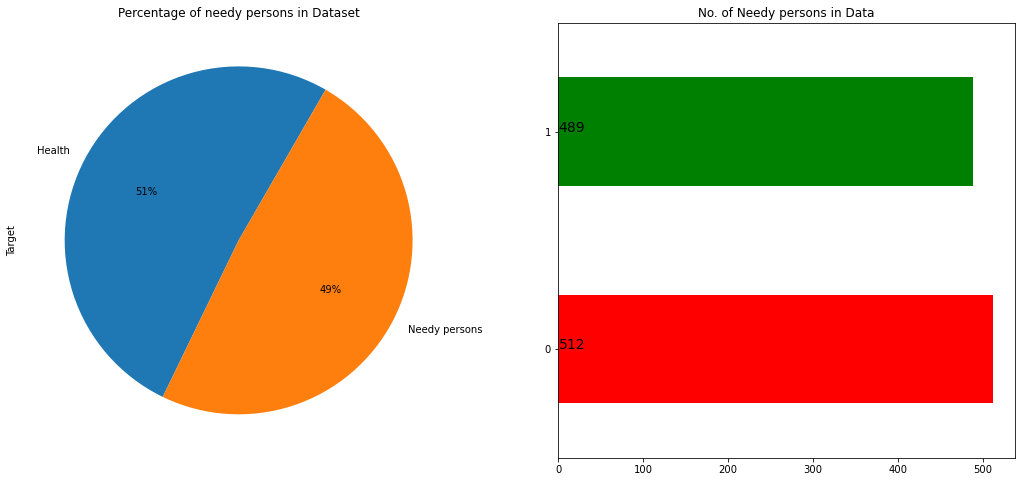

In [7]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(18,8))

ax1 = hl['Target'].value_counts().plot.pie( x="Health" ,y ='no.of needy persons', 
                   autopct = "%2.0f%%",labels=["Health","Needy persons"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of needy persons in Dataset')
colors = ['#99ff99','#ffcc99']

ax2 = hl["Target"].value_counts().plot(kind="barh" ,ax =ax2,color=['red','green'])
for i,j in enumerate(hl["Target"].value_counts().values):
    ax2.text(0.5,i,j,fontsize=14)
ax2.set(title = 'No. of Needy persons in Data')
plt.show()

In [8]:
categorical_val = []
continous_val = []
for column in hl.columns:
    print('==============================')
    print(f"{column} : {hl[column].unique()}")
    if len(hl[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

Aadhar_id : [199000000000 994000000000 299000000000 399000000000 499000000000
 699000000000 114000000000 124000000000 134000000000 992000000000
 993000000000 995000000000 231000000000 241000000000 531000000000
 251000000000 261000000000 271000000000 281000000000 291000000000
 301000000000 311000000000 321000000000 331000000000 341000000000
 351000000000 361000000000 371000000000 381000000000 391000000000
 401000000000 411000000000 421000000000 431000000000 441000000000
 451000000000 461000000000 471000000000 481000000000 491000000000
 501000000000 511000000000 521000000000 534000000000 551000000000
 561000000000 571000000000 581000000000 601000000000 611000000000
 621000000000 631000000000 641000000000 651000000000 661000000000
 671000000000 681000000000 988000000000 701000000000 711000000000
 721000000000 731000000000 741000000000 751000000000 761000000000
 771000000000 808000000000 735000000000 121000000000 322000000000
 274000000000 277000000000 801000000000 802000000000 81300000000

In [9]:
categorical_val

['Rationcard_Category',
 'Gender',
 'Chronic _Disease',
 'Critical _or _noncritical',
 'Surgery_needed',
 'Target']

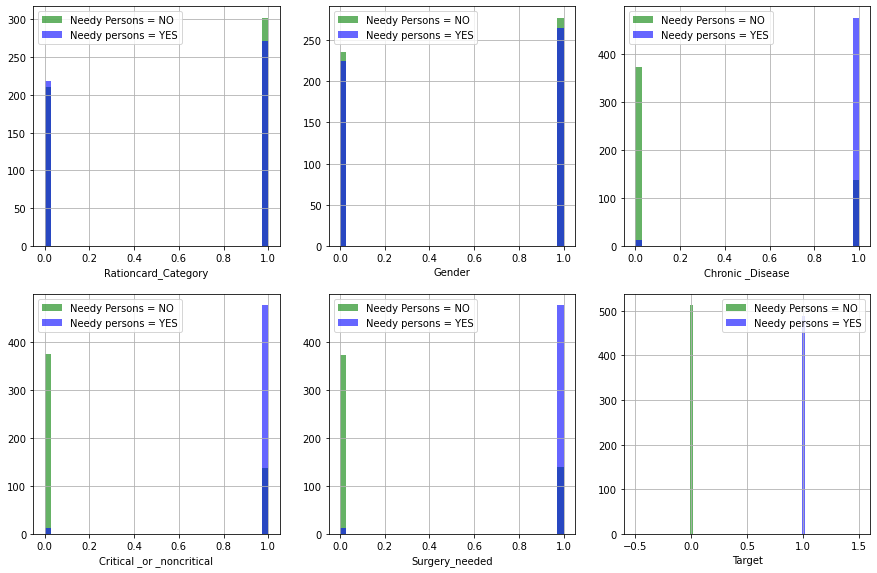

In [10]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    hl[hl["Target"] == 0][column].hist(bins=35, color='green', label='Needy Persons = NO', alpha=0.6)
    hl[hl["Target"] == 1][column].hist(bins=35, color='blue', label='Needy persons = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

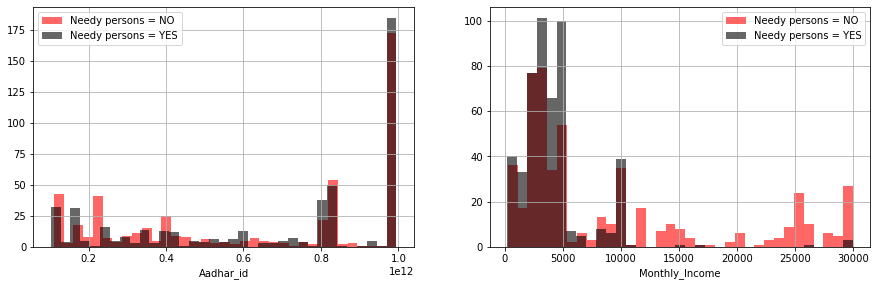

In [11]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    hl[hl["Target"] == 0][column].hist(bins=35, color='red', label='Needy persons = NO', alpha=0.6)
    hl[hl["Target"] == 1][column].hist(bins=35, color='black', label='Needy persons = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [12]:
hl.head()

,Aadhar_id,Rationcard_Category,Monthly_Income,Gender,Chronic _Disease,Critical _or _noncritical,Surgery_needed,Target
0,199000000000,1,10000,1,1,1,1,1
1,994000000000,1,10000,1,1,1,1,1
2,299000000000,1,10000,1,1,1,1,1
3,399000000000,1,10000,1,1,1,1,0
4,499000000000,1,9000,1,0,0,0,1


(8.5, -0.5)

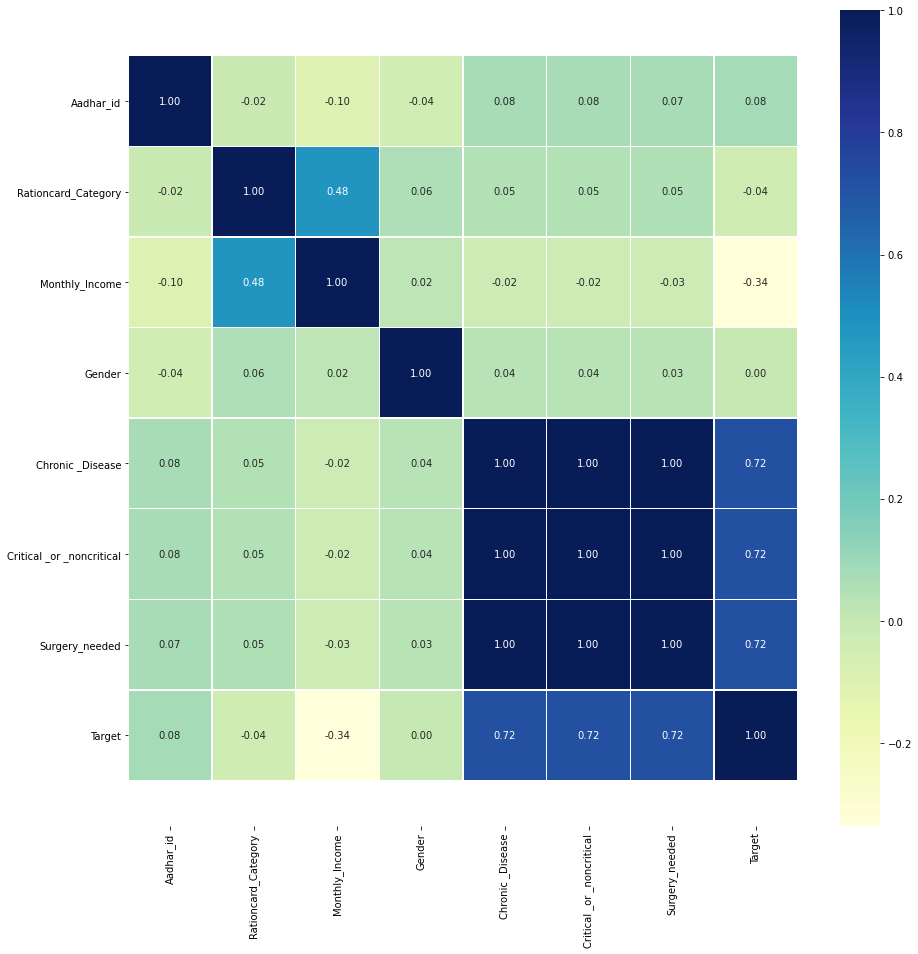

In [13]:
corr_matrix = hl.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<AxesSubplot:title={'center':'Correlation with target'}>

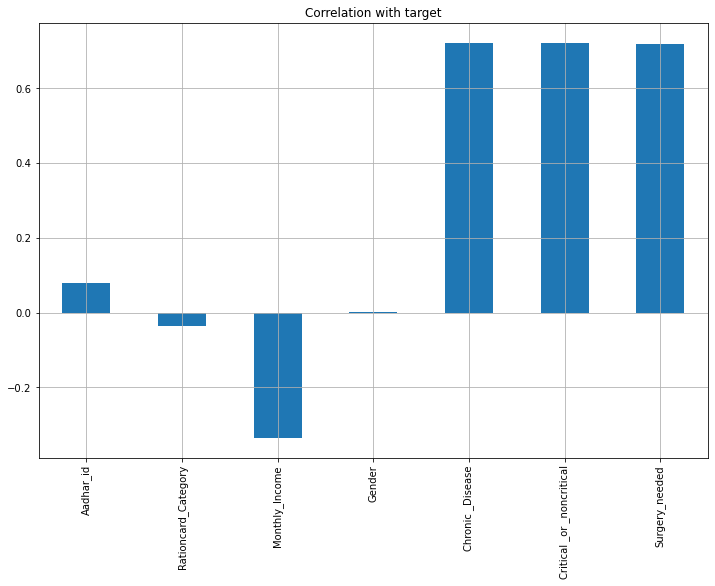

In [14]:
hl.drop('Target', axis=1).corrwith(hl.Target).plot(kind='bar', grid=True, figsize=(12, 8),title="Correlation with target")

In [15]:
categorical_val.remove('Target')
dataset = pd.get_dummies(hl, columns = categorical_val)

In [16]:
dataset.head()

,Aadhar_id,Monthly_Income,Target,Rationcard_Category_0,Rationcard_Category_1,Gender_0,Gender_1,Chronic _Disease_0,Chronic _Disease_1,Critical _or _noncritical_0,Critical _or _noncritical_1,Surgery_needed_0,Surgery_needed_1
0,199000000000,10000,1,0,1,0,1,0,1,0,1,0,1
1,994000000000,10000,1,0,1,0,1,0,1,0,1,0,1
2,299000000000,10000,1,0,1,0,1,0,1,0,1,0,1
3,399000000000,10000,0,0,1,0,1,0,1,0,1,0,1
4,499000000000,9000,1,0,1,0,1,1,0,1,0,1,0


In [17]:
print(hl.columns)
print(dataset.columns)

Index(['Aadhar_id', 'Rationcard_Category', 'Monthly_Income', 'Gender',
       'Chronic _Disease', 'Critical _or _noncritical', 'Surgery_needed',
       'Target'],
      dtype='object')
Index(['Aadhar_id', 'Monthly_Income', 'Target', 'Rationcard_Category_0',
       'Rationcard_Category_1', 'Gender_0', 'Gender_1', 'Chronic _Disease_0',
       'Chronic _Disease_1', 'Critical _or _noncritical_0',
       'Critical _or _noncritical_1', 'Surgery_needed_0', 'Surgery_needed_1'],
      dtype='object')


In [18]:
hl= hl.drop(columns="Aadhar_id")


In [19]:
hl.head()

,Rationcard_Category,Monthly_Income,Gender,Chronic _Disease,Critical _or _noncritical,Surgery_needed,Target
0,1,10000,1,1,1,1,1
1,1,10000,1,1,1,1,1
2,1,10000,1,1,1,1,1
3,1,10000,1,1,1,1,0
4,1,9000,1,0,0,0,1


In [20]:
hl.shape

(1001, 7)

In [21]:
from sklearn.model_selection import train_test_split

X = hl.drop('Target', axis=1)
y = hl.Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [22]:
print('Distribution of target variable in training set')
print(y_train.value_counts())

print('Distribution of target variable in test set')
print(y_test.value_counts())

Distribution of target variable in training set
0    364
1    336
Name: Target, dtype: int64
Distribution of target variable in test set
1    153
0    148
Name: Target, dtype: int64


In [23]:
print('------------Training Set------------------')
print(X_train.shape)
print(y_train.shape)

print('------------Test Set------------------')
print(X_test.shape)
print(y_test.shape)

------------Training Set------------------
(700, 6)
(700,)
------------Test Set------------------
(301, 6)
(301,)


In [24]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

model_svm = svm.SVC()
model_svm.fit(X_train,y_train)
print('Accuracy of our SVM model on the training data is {:.2f} out of 1'.format(model_svm.score(X_train, y_train)))
print('Accuracy of our SVM model on the test data is {:.2f} out of 1'.format(model_svm.score(X_test, y_test)))
y_svm_pred = model_svm.predict(X_test)
print("Confusion Matrix of SVM:")
print(confusion_matrix(y_test, y_svm_pred))
print("Testing Accuracy of SVM :", accuracy_score(y_test,y_svm_pred))
print("Classification Report : ")
print(classification_report(y_test, y_svm_pred))
print(y_test)
print(y_svm_pred)

Accuracy of our SVM model on the training data is 0.61 out of 1
Accuracy of our SVM model on the test data is 0.65 out of 1
Confusion Matrix of SVM:
[[ 56  92]
 [ 14 139]]
Testing Accuracy of SVM : 0.6478405315614618
Classification Report : 
              precision    recall  f1-score   support

           0       0.80      0.38      0.51       148
           1       0.60      0.91      0.72       153

    accuracy                           0.65       301
   macro avg       0.70      0.64      0.62       301
weighted avg       0.70      0.65      0.62       301

544    0
515    1
193    1
11     0
279    0
      ..
477    0
562    0
636    0
510    1
905    1
Name: Target, Length: 301, dtype: int64
[1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1
 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 

In [25]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train,y_train)
print('Accuracy of our RF model on the training data is {:.2f} out of 1'.format(model_rf.score(X_train, y_train)))
print('Accuracy of our RF model on the test data is {:.2f} out of 1'.format(model_rf.score(X_test, y_test)))

y_rf_pred = model_rf.predict(X_test)

print("Confusion Matrix of Random Forest:")
print(confusion_matrix(y_test, y_rf_pred))
print("Accuracy of Random Forest :", accuracy_score(y_test,y_rf_pred))
print("Classification Report : ")
print(classification_report(y_test, y_rf_pred))
print(y_test)
print(y_rf_pred)

Accuracy of our RF model on the training data is 0.95 out of 1
Accuracy of our RF model on the test data is 0.89 out of 1
Confusion Matrix of Random Forest:
[[124  24]
 [ 10 143]]
Accuracy of Random Forest : 0.8870431893687708
Classification Report : 
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       148
           1       0.86      0.93      0.89       153

    accuracy                           0.89       301
   macro avg       0.89      0.89      0.89       301
weighted avg       0.89      0.89      0.89       301

544    0
515    1
193    1
11     0
279    0
      ..
477    0
562    0
636    0
510    1
905    1
Name: Target, Length: 301, dtype: int64
[0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1
 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1
 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1
 1 1 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 0 1 1 1 

In [26]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
model_ada = AdaBoostClassifier()
model_ada.fit(X_train,y_train)
print('Accuracy of our ADA model on the training data is {:.2f} out of 1'.format(model_ada.score(X_train, y_train)))
print('Accuracy of our ADA model on the test data is {:.2f} out of 1'.format(model_ada.score(X_test, y_test)))

prediction = model_ada.predict(X_test)
accuracy = accuracy_score(prediction,y_test)
cm = confusion_matrix(prediction,y_test)
prfs = precision_recall_fscore_support(prediction,y_test)
print('Accuracy: ',accuracy)
print('\n')
print('Confusion Matrix: ',cm)
print('\n')
print('Precision: ', prfs[0])
print('Recall:    ', prfs[1])
print('Fscore:    ', prfs[2])
print('Support:   ', prfs[3])

Accuracy of our ADA model on the training data is 0.94 out of 1
Accuracy of our ADA model on the test data is 0.90 out of 1
Accuracy:  0.9036544850498339


Confusion Matrix:  [[125   6]
 [ 23 147]]


Precision:  [0.84459459 0.96078431]
Recall:     [0.95419847 0.86470588]
Fscore:     [0.89605735 0.91021672]
Support:    [131 170]


In [27]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
print('Accuracy of our KNN model on the training data is {:.2f} out of 1'.format(model_knn.score(X_train, y_train)))
print('Accuracy of our KNN model on the test data is {:.2f} out of 1'.format(model_knn.score(X_test, y_test)))

prediction = model_knn.predict(X_test)
accuracy = accuracy_score(prediction,y_test)
cm = confusion_matrix(prediction,y_test)
prfs = precision_recall_fscore_support(prediction,y_test)
print('Accuracy: ',accuracy)
print('\n')
print('Confusion Matrix: ',cm)
print('\n')
print('Precision: ', prfs[0])
print('Recall:    ', prfs[1])
print('Fscore:    ', prfs[2])
print('Support:   ', prfs[3])

Accuracy of our KNN model on the training data is 0.91 out of 1
Accuracy of our KNN model on the test data is 0.89 out of 1
Accuracy:  0.8903654485049833


Confusion Matrix:  [[121   6]
 [ 27 147]]


Precision:  [0.81756757 0.96078431]
Recall:     [0.95275591 0.84482759]
Fscore:     [0.88       0.89908257]
Support:    [127 174]


In [28]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(solver='liblinear')
model_lr.fit(X_train, y_train)
print('Accuracy of our LR model on the training data is {:.2f} out of 1'.format(model_lr.score(X_train, y_train)))
print('Accuracy of our LR model on the test data is {:.2f} out of 1'.format(model_lr.score(X_test, y_test)))

prediction = model_lr.predict(X_test)
accuracy = accuracy_score(prediction,y_test)
cm = confusion_matrix(prediction,y_test)
prfs = precision_recall_fscore_support(prediction,y_test)
print('Accuracy: ',accuracy)
print('\n')
print('Confusion Matrix: ',cm)
print('\n')
print('Precision: ', prfs[0])
print('Recall:    ', prfs[1])
print('Fscore:    ', prfs[2])
print('Support:   ', prfs[3])


Accuracy of our LR model on the training data is 0.92 out of 1
Accuracy of our LR model on the test data is 0.89 out of 1
Accuracy:  0.8903654485049833


Confusion Matrix:  [[121   6]
 [ 27 147]]


Precision:  [0.81756757 0.96078431]
Recall:     [0.95275591 0.84482759]
Fscore:     [0.88       0.89908257]
Support:    [127 174]


In [29]:
from sklearn.tree import DecisionTreeClassifier


model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

print('Accuracy of our DT model on the training data is {:.2f} out of 1'.format(model_dt.score(X_train, y_train)))
print('Accuracy of our DT model on the test data is {:.2f} out of 1'.format(model_dt.score(X_test, y_test)))

prediction = model_dt.predict(X_test)
accuracy = accuracy_score(prediction,y_test)
cm = confusion_matrix(prediction,y_test)
prfs = precision_recall_fscore_support(prediction,y_test)
print('Accuracy: ',accuracy)
print('\n')
print('Confusion Matrix: ',cm)
print('\n')
print('Precision: ', prfs[0])
print('Recall:    ', prfs[1])
print('Fscore:    ', prfs[2])
print('Support:   ', prfs[3])

Accuracy of our DT model on the training data is 0.95 out of 1
Accuracy of our DT model on the test data is 0.89 out of 1
Accuracy:  0.8903654485049833


Confusion Matrix:  [[126  11]
 [ 22 142]]


Precision:  [0.85135135 0.92810458]
Recall:     [0.91970803 0.86585366]
Fscore:     [0.88421053 0.89589905]
Support:    [137 164]


In [31]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
print('Accuracy of our XGB model on the training data is {:.2f} out of 1'.format(model_xgb.score(X_train, y_train)))
print('Accuracy of our XGB model on the test data is {:.2f} out of 1'.format(model_xgb.score(X_test, y_test)))

prediction = model_xgb.predict(X_test)
accuracy = accuracy_score(prediction,y_test)
cm = confusion_matrix(prediction,y_test)
prfs = precision_recall_fscore_support(prediction,y_test)
print('Accuracy: ',accuracy)
print('\n')
print('Confusion Matrix: ',cm)
print('\n')
print('Precision: ', prfs[0])
print('Recall:    ', prfs[1])
print('Fscore:    ', prfs[2])
print('Support:   ', prfs[3])


[13:01:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of our XGB model on the training data is 0.94 out of 1
Accuracy of our XGB model on the test data is 0.90 out of 1
Accuracy:  0.9036544850498339


Confusion Matrix:  [[125   6]
 [ 23 147]]


Precision:  [0.84459459 0.96078431]
Recall:     [0.95419847 0.86470588]
Fscore:     [0.89605735 0.91021672]
Support:    [131 170]


In [111]:
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB() 
model_nb.fit(X_train, y_train) 
print('Accuracy of our NB model on the training data is {:.2f} out of 1'.format(model_nb.score(X_train, y_train)))
print('Accuracy of our NB model on the test data is {:.2f} out of 1'.format(model_nb.score(X_test, y_test)))

prediction = model_nb.predict(X_test)
accuracy = accuracy_score(prediction,y_test)
cm = confusion_matrix(prediction,y_test)
prfs = precision_recall_fscore_support(prediction,y_test)
print('Accuracy: ',accuracy)
print('\n')
print('Confusion Matrix: ',cm)
print('\n')
print('Precision: ', prfs[0])
print('Recall:    ', prfs[1])
print('Fscore:    ', prfs[2])
print('Support:   ', prfs[3])


Accuracy of our NB model on the training data is 0.91 out of 1
Accuracy of our NB model on the test data is 0.89 out of 1
Accuracy:  0.8870431893687708


Confusion Matrix:  [[119   5]
 [ 29 148]]


Precision:  [0.80405405 0.96732026]
Recall:     [0.95967742 0.83615819]
Fscore:     [0.875     0.8969697]
Support:    [124 177]


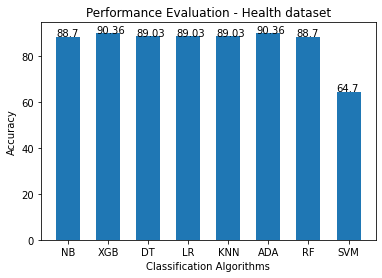

In [32]:
import matplotlib.pyplot as plt

# set the initial x-values to what you are wanting to plot
x=['NB','XGB','DT','LR','KNN','ADA','RF','SVM']
y=[88.7,
90.36,
89.03,
89.03,
89.03,
90.36,
88.70,
64.70]

bars = plt.bar(x, height=y, width=.6)

xlocs, xlabs = plt.xticks()

# reference x so you don't need to change the range each time x changes
xlocs=[i for i in x]
xlabs=[i for i in x]

plt.title("Performance Evaluation - Health dataset")
plt.xlabel('Classification Algorithms')
plt.ylabel('Accuracy')
plt.xticks(xlocs, xlabs)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)

plt.show()